In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import jedi
%matplotlib inline

In [2]:
def read_temper(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    return t4

In [59]:
def read_temper(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)
    
    all_energy_list = []
    for i in range(n):
        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file).assign(Run = i)
        energy.columns = energy.columns.str.strip()
        energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
        all_energy_list.append(energy)
    energy = pd.concat(all_energy_list)
    
    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t5 = t5.assign(TotalE = t5.Energy + t5.Lipid)
    return t5

In [55]:
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/simulation/dis_30.0/0/energy.0.dat"
location = "/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_extended/simulation/dis_30.0/0/energy.0.dat"
i =0 
energy = pd.read_csv(location).assign(Run = i)
energy.columns = energy.columns.str.strip()
energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]

In [72]:
location = "/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_topology/simulation/dis_30.0/0/"
n= 12
data= read_temper(location=location, n=n)

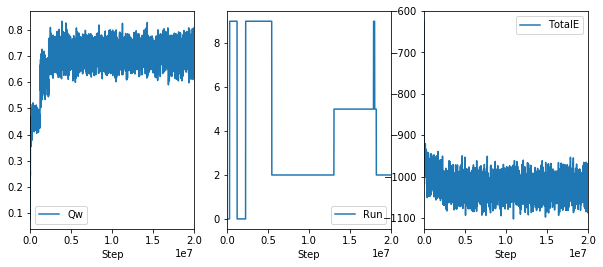

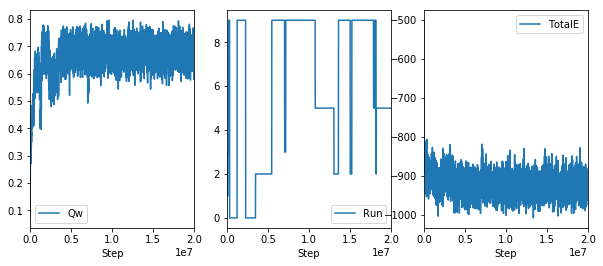

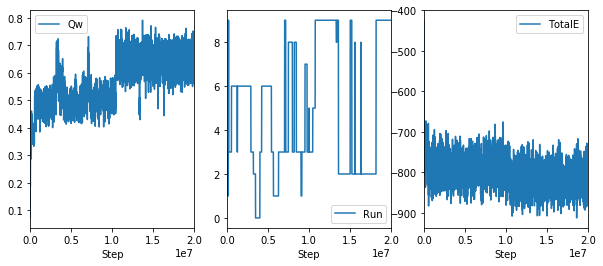

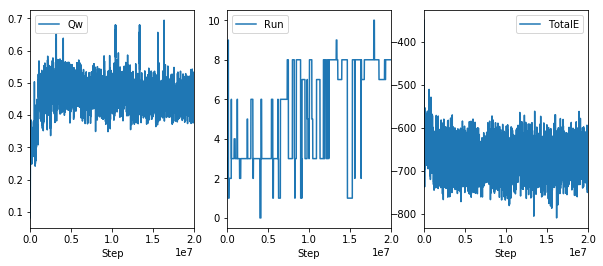

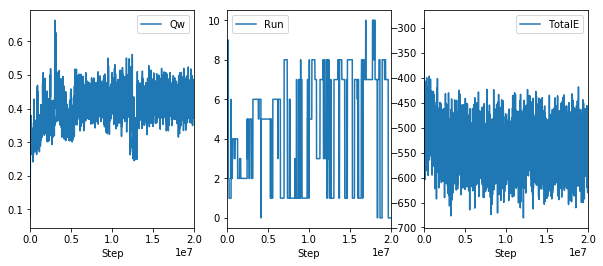

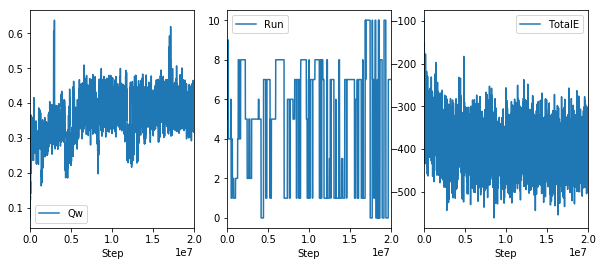

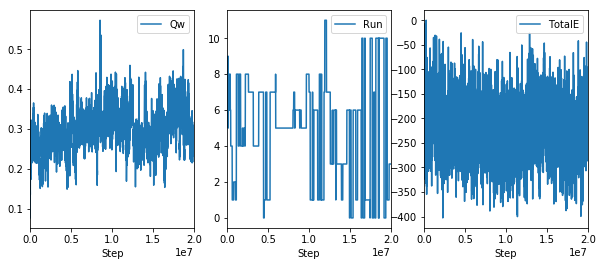

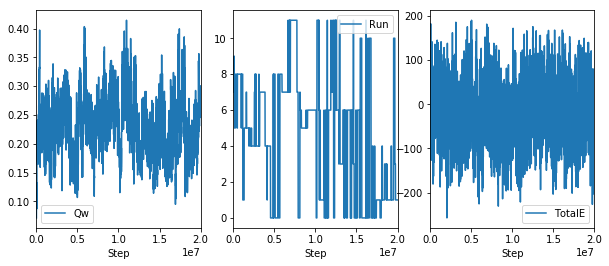

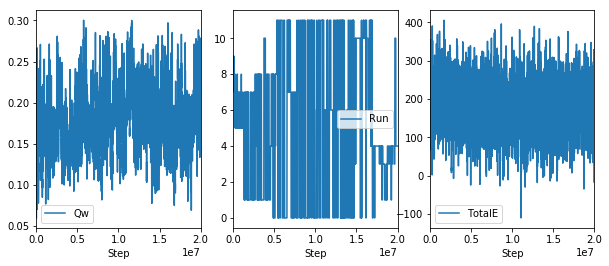

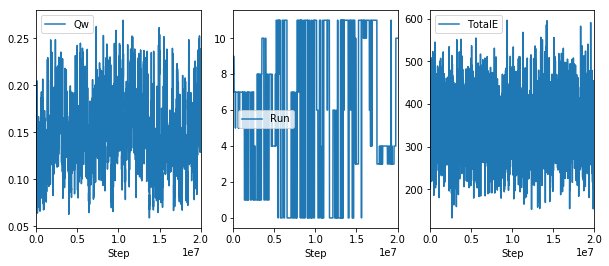

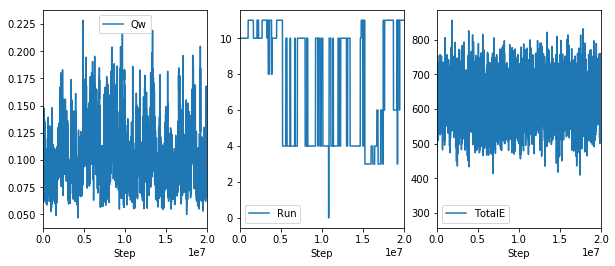

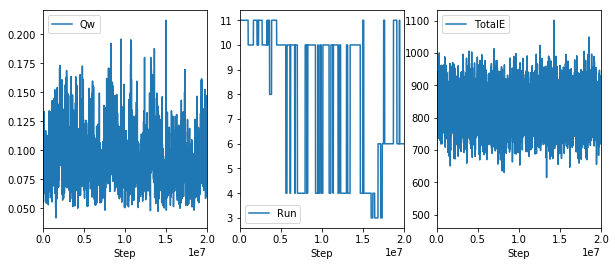

In [73]:
for i in range(12):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))
    tmp = data.query('Temp=="T{}"'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
#     tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'TotalE', subplots=True, ax=axs[2])
    tmp.plot('Step', 'Run', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

In [64]:
location = "/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_topology/simulation/dis_80.0/0/"
n= 12
data= read_temper(location=location, n=n)

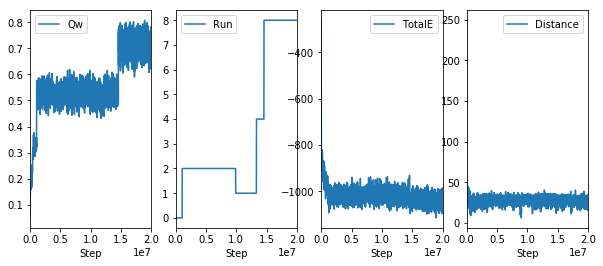

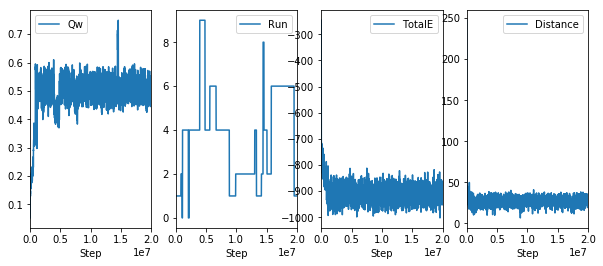

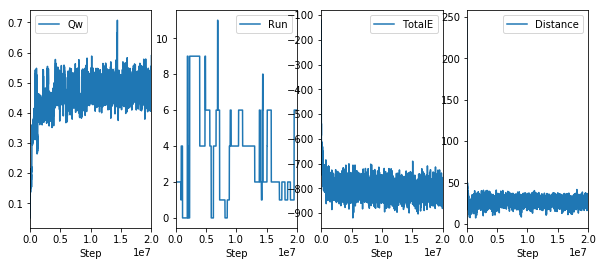

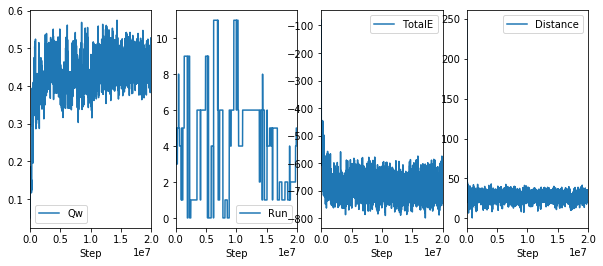

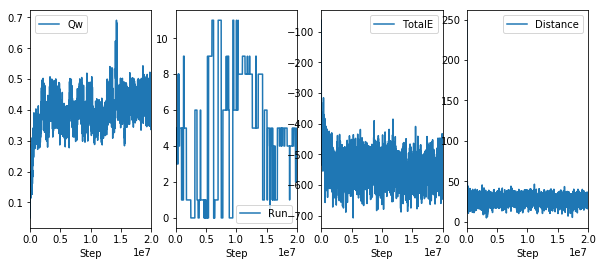

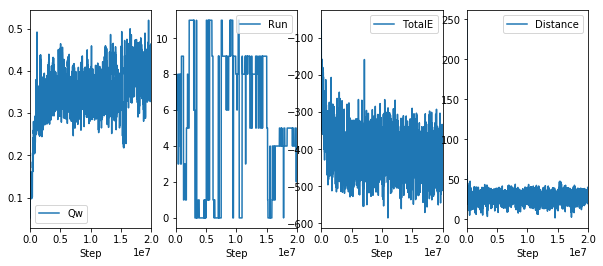

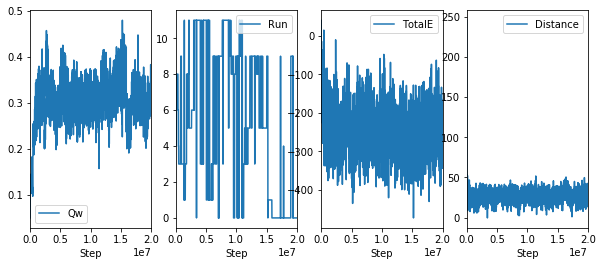

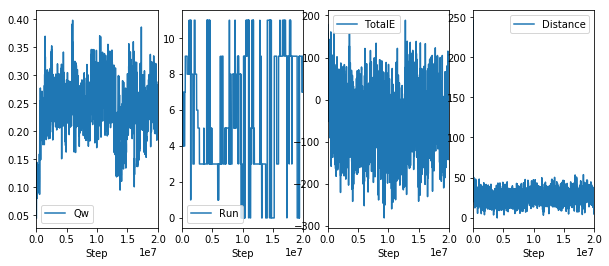

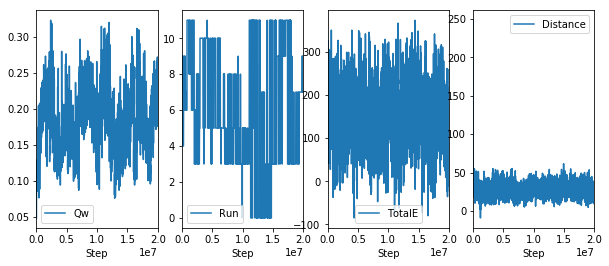

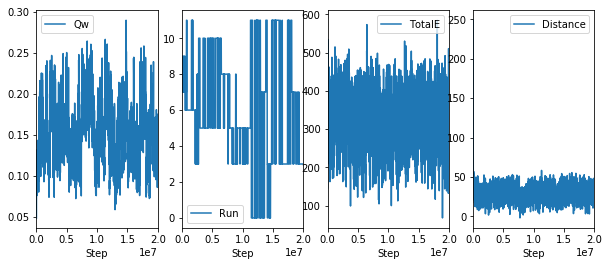

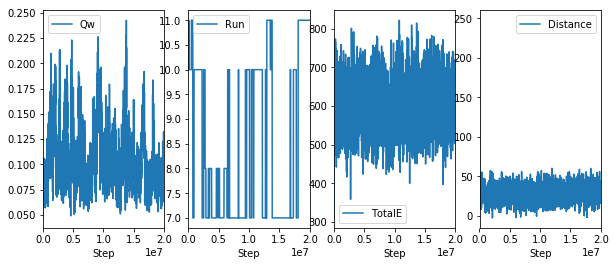

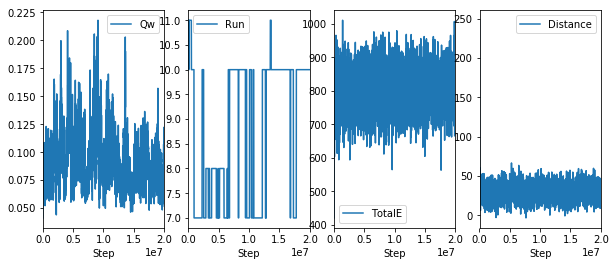

In [76]:
location = "/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_extended/simulation/dis_30.0/0/"
n= 12
data= read_temper(location=location, n=n)
for i in range(12):
    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(10, 4))
    tmp = data.query('Temp=="T{}"'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
#     tmp = tmp.assign(myT = tmp['Temp'].map(dic))Distance
    tmp.plot('Step', 'Distance', subplots=True, ax=axs[3])
    tmp.plot('Step', 'TotalE', subplots=True, ax=axs[2])
    tmp.plot('Step', 'Run', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

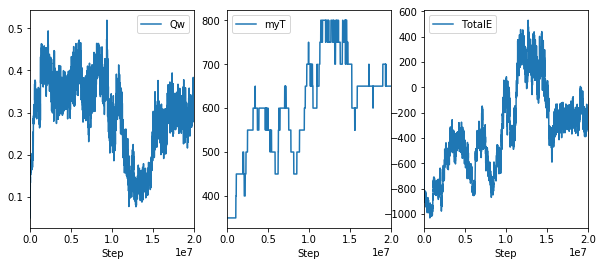

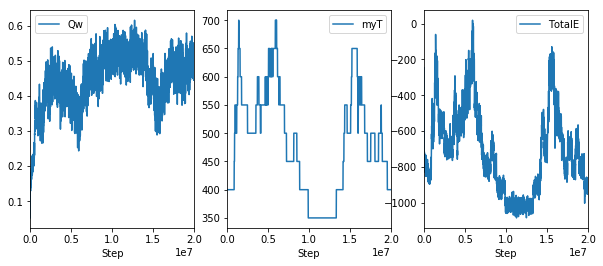

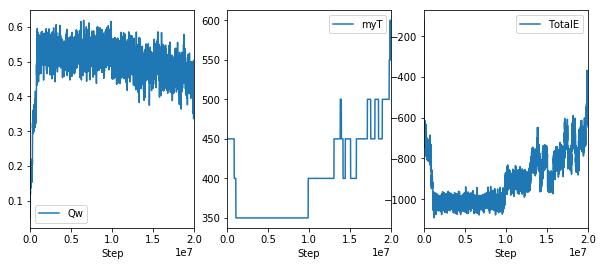

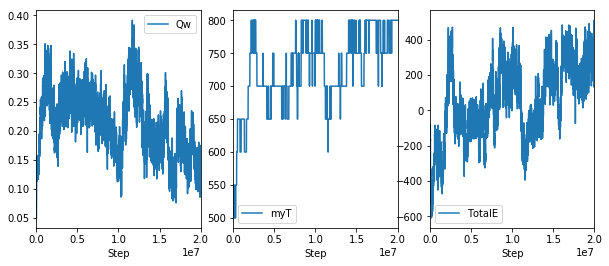

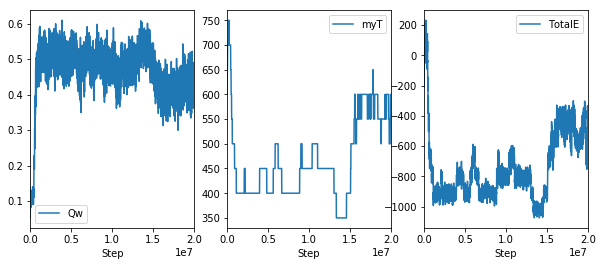

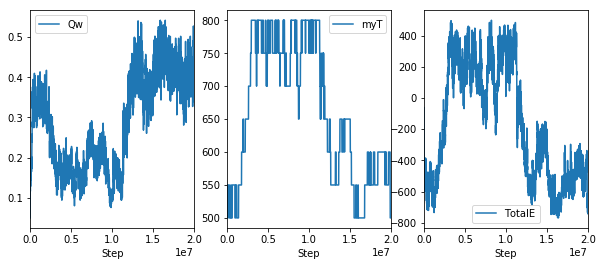

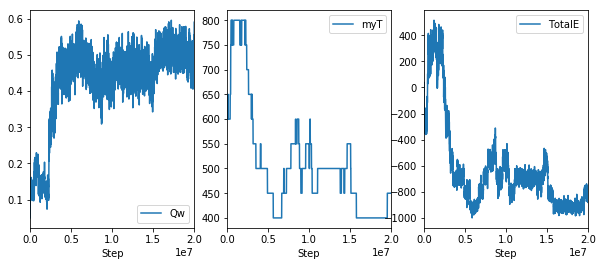

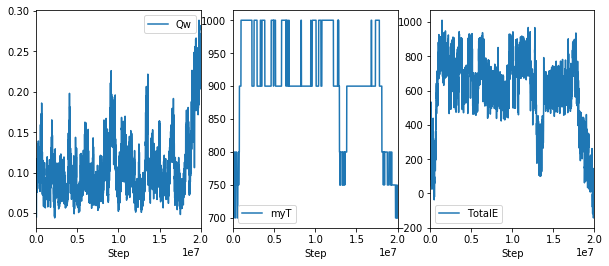

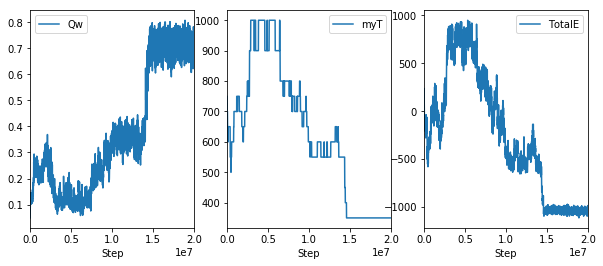

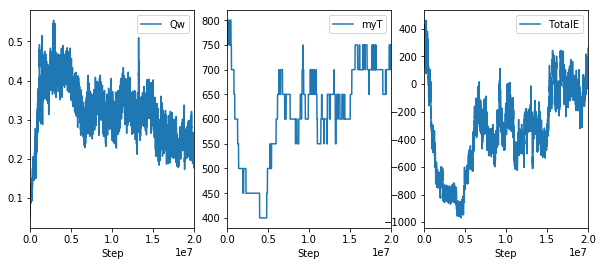

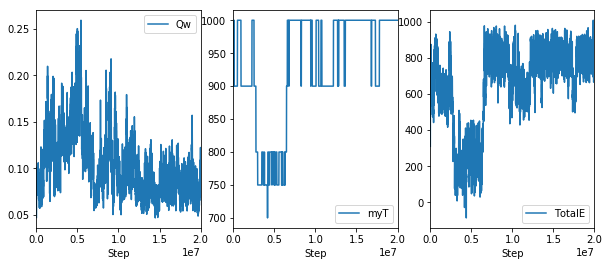

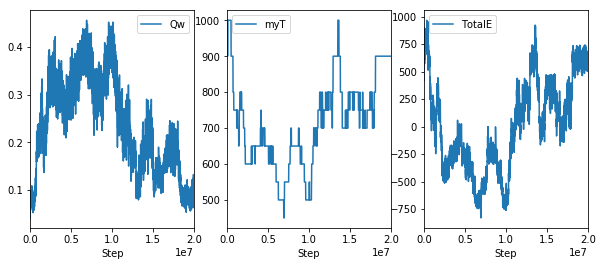

In [70]:
for i in range(12):
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'TotalE', subplots=True, ax=axs[2])
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

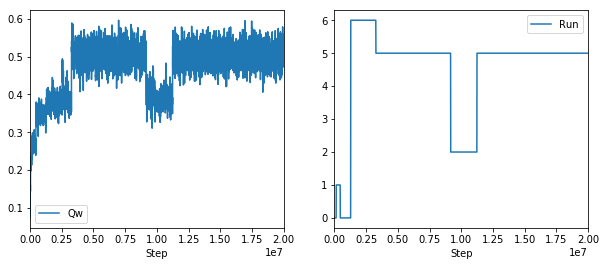

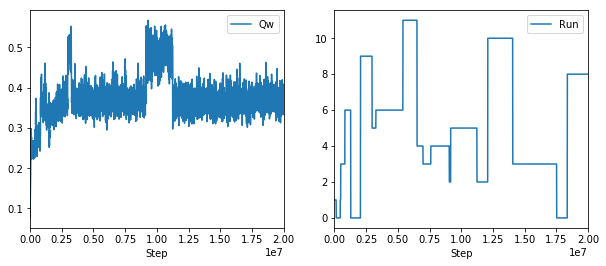

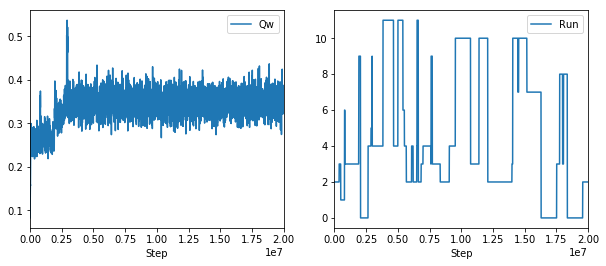

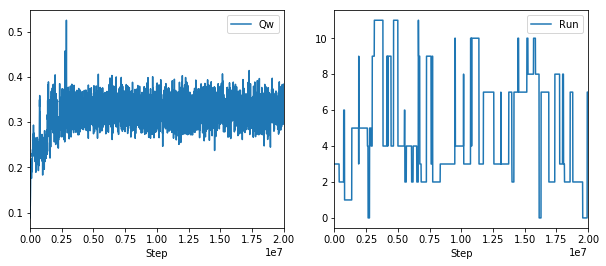

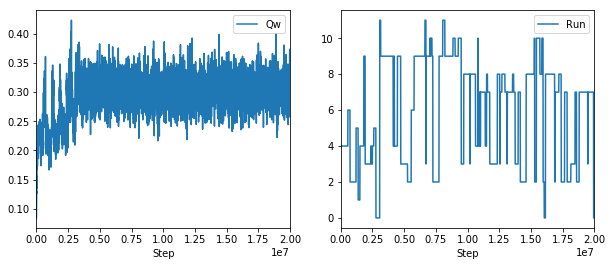

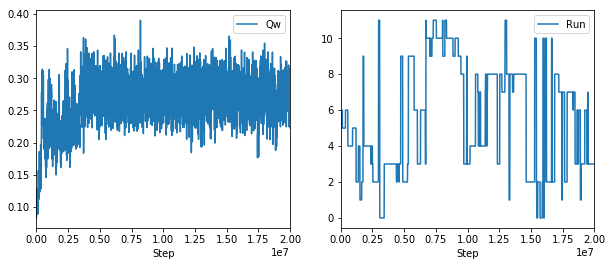

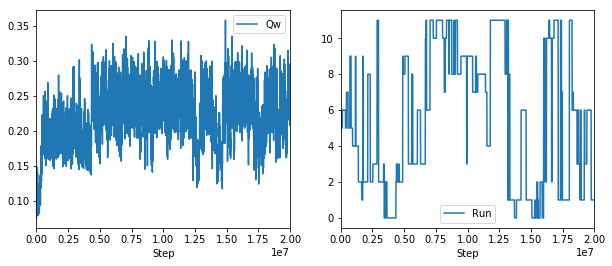

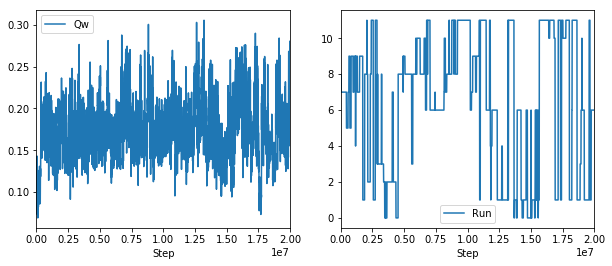

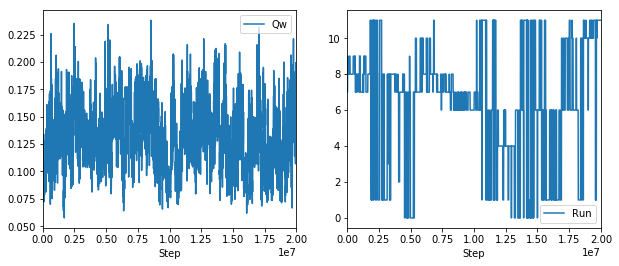

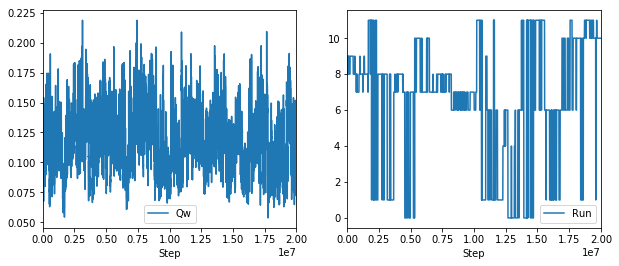

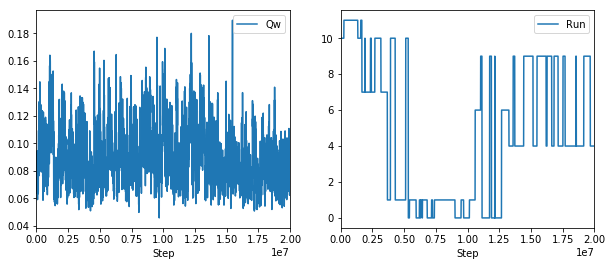

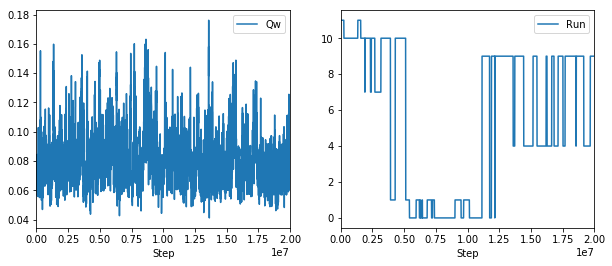

In [66]:
for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Temp=="T{}"'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
#     tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'Run', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

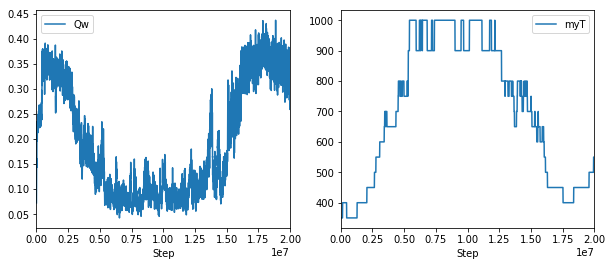

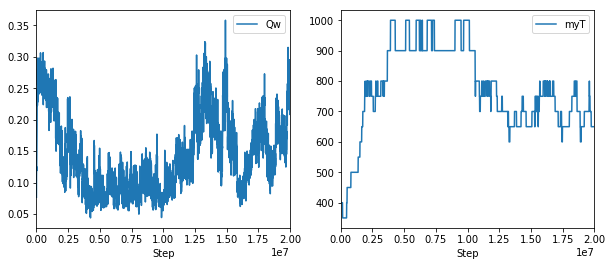

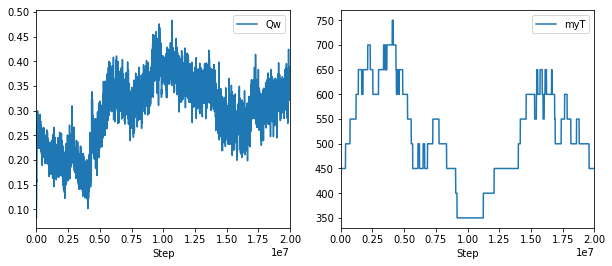

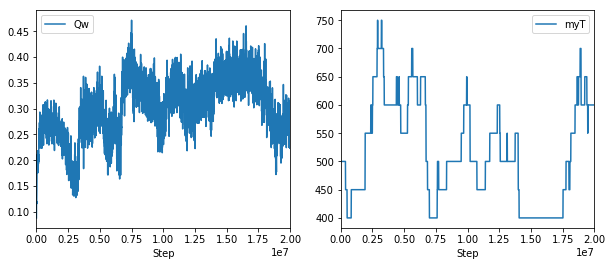

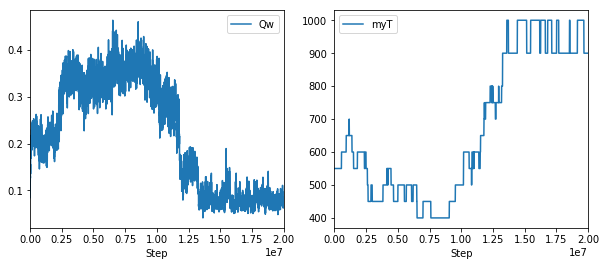

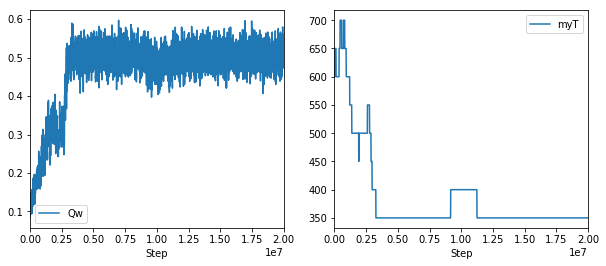

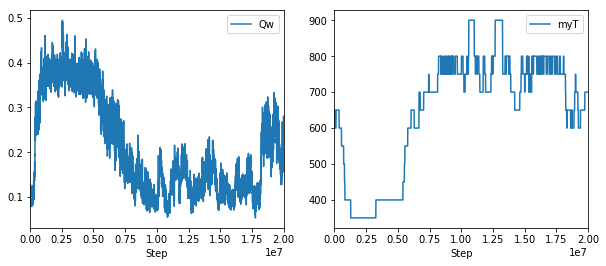

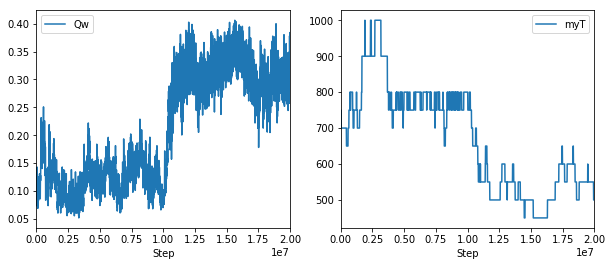

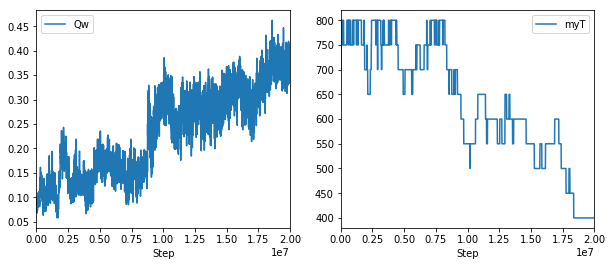

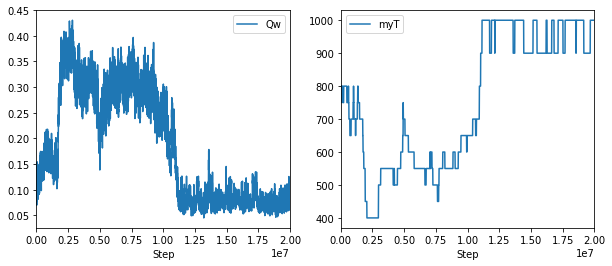

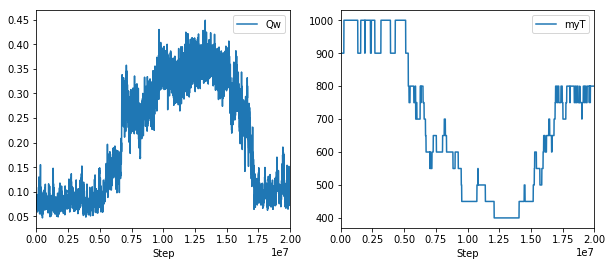

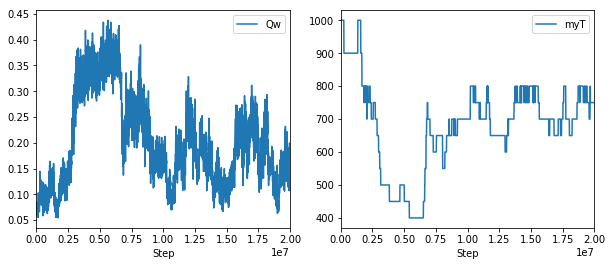

In [65]:
for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

In [60]:
location = "/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_topology/simulation/dis_30.0/0/"
n= 12
data= read_temper(location=location, n=n)

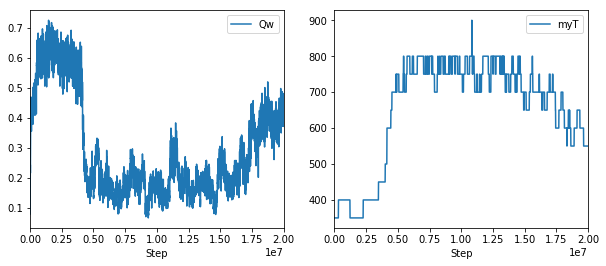

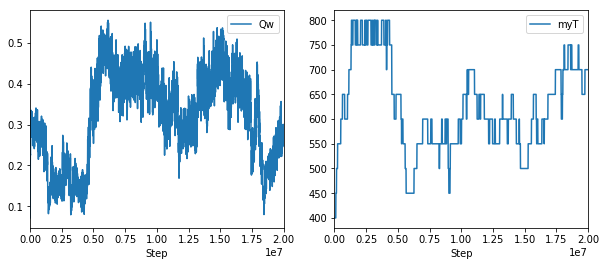

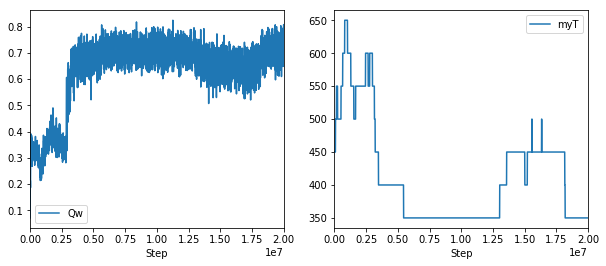

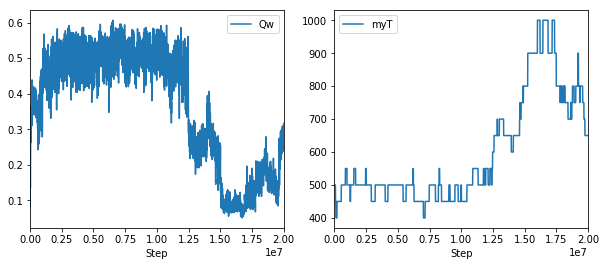

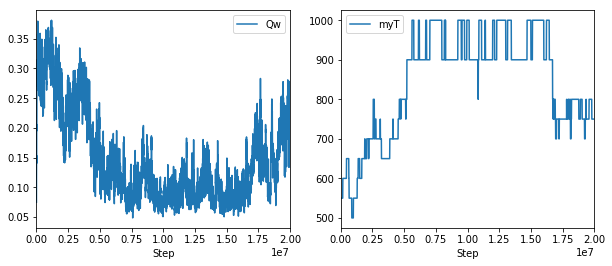

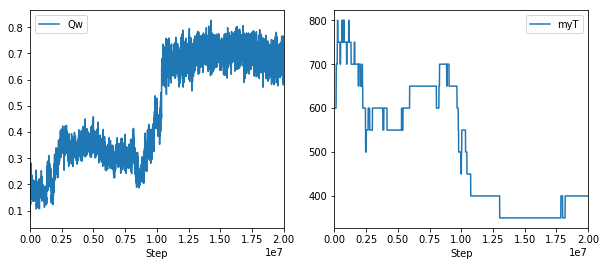

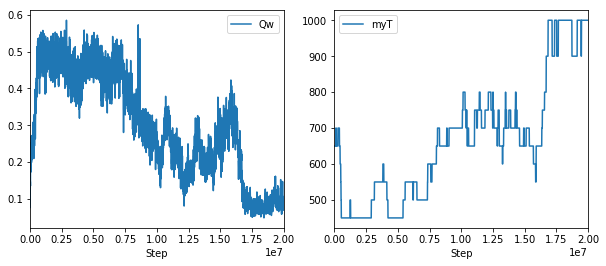

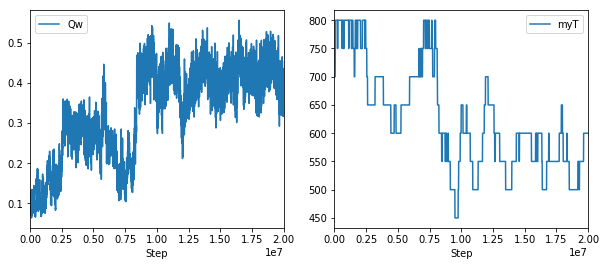

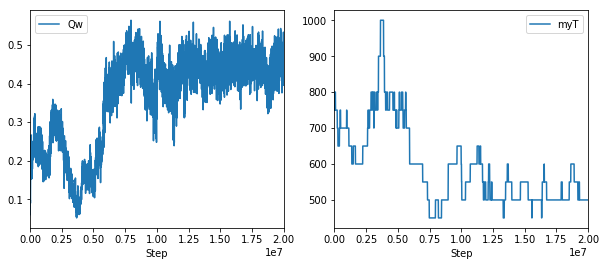

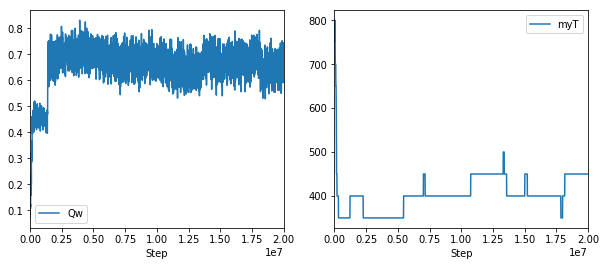

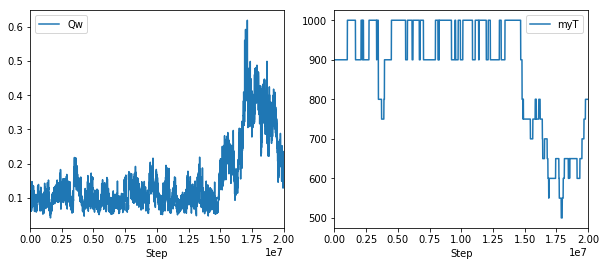

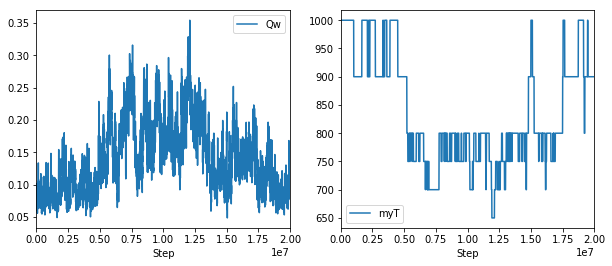

In [63]:
for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

In [67]:
folder_list = [
   '/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_extended/',
    '/Users/weilu/Research/server/oct_2017/week_oct16/memb_2_rg_0.1_lipid_1_topology/'
]
dis_list = np.linspace(30, 130, 51)
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        print(dis)
        location = folder + "/simulation/dis_{}/0/".format(dis)
        data = read_temper(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp.to_csv(location+"t{}.dat".format(dic[temp]), sep=' ', index=False, header=False)

30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0
